In [1]:
from mat73 import loadmat
data = loadmat('G_Ready-Set_bin1ms_alignedReady.mat')

In [2]:
data.keys()

dict_keys(['D', 'id_eye', 'id_left', 'id_neuron', 'id_short', 'id_trial', 'sp_times', 't_p', 't_s', 'wbin'])

In [3]:
import numpy as np
t_p = np.concatenate(data['t_p'])
t_s = np.concatenate(data['t_s'])
id_short = np.concatenate(data['id_short'])

In [ ]:
ts_unq = np.unique(t_s)
mean_tp = []
mean_tp_short = []
mean_tp_long = []

for t in ts_unq:
    tpcurr = t_p[t_s==t]
    mean_tp.append(np.mean(tpcurr))
    tpshort = tpcurr[id_short[t_s==t]==True]
    tplong = tpcurr[id_short[t_s==t]==False]
    mean_tp_short.append(np.mean(tpshort))
    mean_tp_long.append(np.mean(tplong))

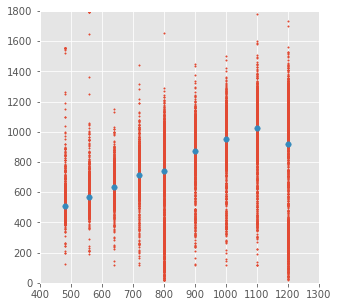

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
fig = plt.figure(1, (5,5))
plt.scatter(t_s, t_p, s=2)
plt.scatter(ts_unq, mean_tp, s=30)
plt.xlim(400, 1300)
plt.ylim(0, 1800)
plt.show()

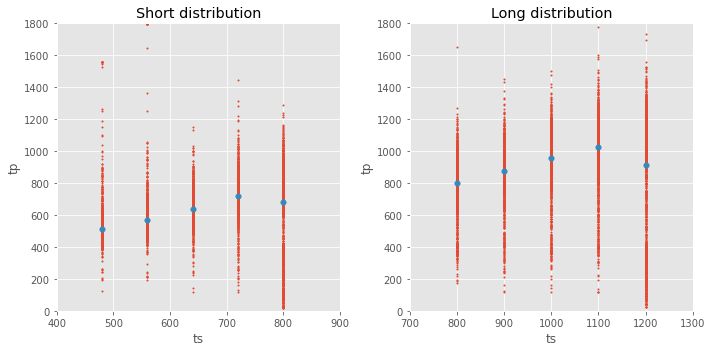

In [96]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(t_s[id_short==True], t_p[id_short==True], s=2)
ax[0].scatter(ts_unq, mean_tp_short, s=30)
ax[1].scatter(t_s[id_short==False], t_p[id_short==False], s=2)
ax[1].scatter(ts_unq, mean_tp_long, s=30)
ax[0].set_xlim(400, 900)
ax[0].set_ylim(0, 1800)
ax[0].set_xlabel('ts')
ax[0].set_ylabel('tp')
ax[1].set_xlabel('ts')
ax[1].set_ylabel('tp')
ax[1].set_xlim(700, 1300)
ax[1].set_ylim(0, 1800)
ax[0].set_title('Short distribution')
ax[1].set_title('Long distribution')
plt.tight_layout()

In [11]:
import numpy as np
from scipy import signal

def gkern(kernlen=10, std=3):
    gkern1d = signal.gaussian(kernlen, std=std) / kernlen
    return gkern1d

In [31]:
gkern()

array([0.03246525, 0.05063356, 0.07066483, 0.08824969, 0.09862071,
       0.09862071, 0.08824969, 0.07066483, 0.05063356, 0.03246525])

In [24]:
data['D'][0].shape      # t_steps, neurons, trials

(1200, 107, 1498)

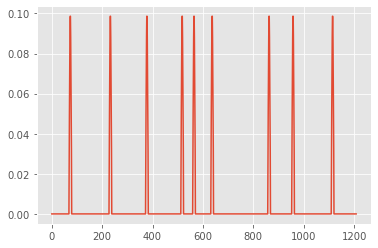

In [99]:
plt.plot(np.convolve(gkern(10), data['D'][0][:,2,1]))

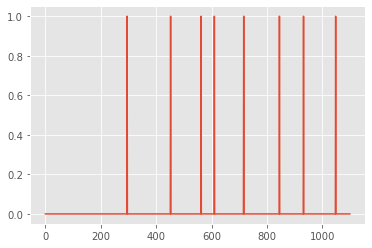

In [30]:
plt.plot(data['D'][0][:,2,0])

In [177]:
print(data['D'][0].shape)
print(data['t_s'][0].shape)

(1200, 107, 1498)
(1498,)


In [182]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data['D'][0].swapaxes(1,2).reshape(1200*1498, 107))
SimpleImputer()
data_imp = imp_mean.transform(data['D'][0].swapaxes(1,2).reshape(1200*1498, 107))

In [183]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data_imp)
PCA(n_components=2)

PCA(n_components=2)

In [ ]:
tr = pca.transform(data_imp)

C:\Users\Laura\AppData\Local\Temp\ipykernel_37352\570835027.py:3: RuntimeWarning: Mean of empty slice
  fr_ts1100 = np.nanmean(data['D'][0][:,neuron, data['t_s'][0]==ts_unq], axis=1)
C:\Users\Laura\AppData\Local\Temp\ipykernel_37352\570835027.py:6: RuntimeWarning: Mean of empty slice
  fr_short = np.nanmean(data['D'][0][:,neuron, data['id_short'][0]==1], axis=1)


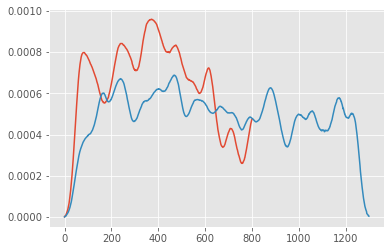

In [173]:
neuron = 10
for ts_unq in np.unique(data['t_s'][0]):
    fr_ts1100 = np.nanmean(data['D'][0][:,neuron, data['t_s'][0]==ts_unq], axis=1)
    #plt.plot(np.convolve(gkern(100,20), fr_ts1100))

fr_short = np.nanmean(data['D'][0][:,neuron, data['id_short'][0]==1], axis=1)
plt.plot(np.convolve(gkern(100,20), fr_short))
fr_long = np.nanmean(data['D'][0][:,neuron, data['id_short'][0]==0], axis=1)
plt.plot(np.convolve(gkern(100,20), fr_long))